In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss, NeighbourhoodCleaningRule, CondensedNearestNeighbour,RepeatedEditedNearestNeighbours, TomekLinks


# Read data that is already preprocessed (feature selection, normalization, etc.)
df = pd.read_csv('../data/processed/train_scaled_pca.csv')


By displaying the distribution of the differents classes, we can see that the dataset is unbalanced. Depending on the classification algorithm we use, this could be a problem. We will try different methods of sampling.

<Axes: xlabel='class', ylabel='count'>

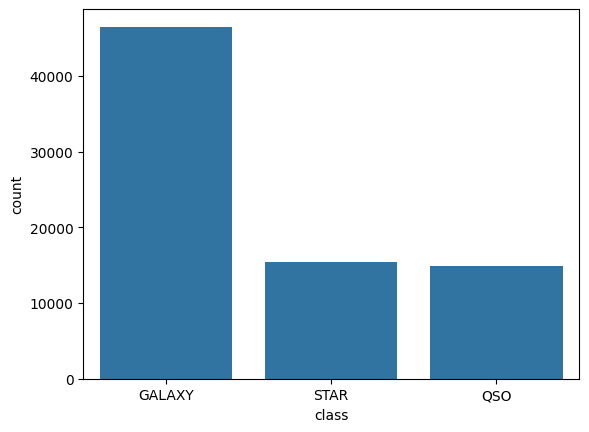

In [2]:
# Repartition of the classes without sampling methods 
sns.countplot(x='class', data=df)

In [3]:
# Print number of samples per class
print(df['class'].value_counts())


class
GALAXY    46497
STAR      15454
QSO       14848
Name: count, dtype: int64


In [4]:
# Prepare the data for the sampling methods
X = df.drop('class', axis=1)
y = df['class']

1. Oversampling

In [5]:
# RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X, y)


In [6]:
# Smote
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X, y)

In [7]:
# Adasyn
ada = ADASYN(random_state=0)
X_ada, y_ada = ada.fit_resample(X, y)

In [8]:
import umap

reducer = umap.UMAP(random_state=0,n_components=2)

In [9]:
from sklearn.decomposition import PCA
reducer = PCA(n_components=2)

In [10]:

embedding_ros = reducer.fit_transform(X_ros)


In [11]:
embedding_ada = reducer.fit_transform(X_ada)

In [12]:
embedding_sm = reducer.fit_transform(X_sm)

In [13]:
embedding_original = reducer.fit_transform(X)

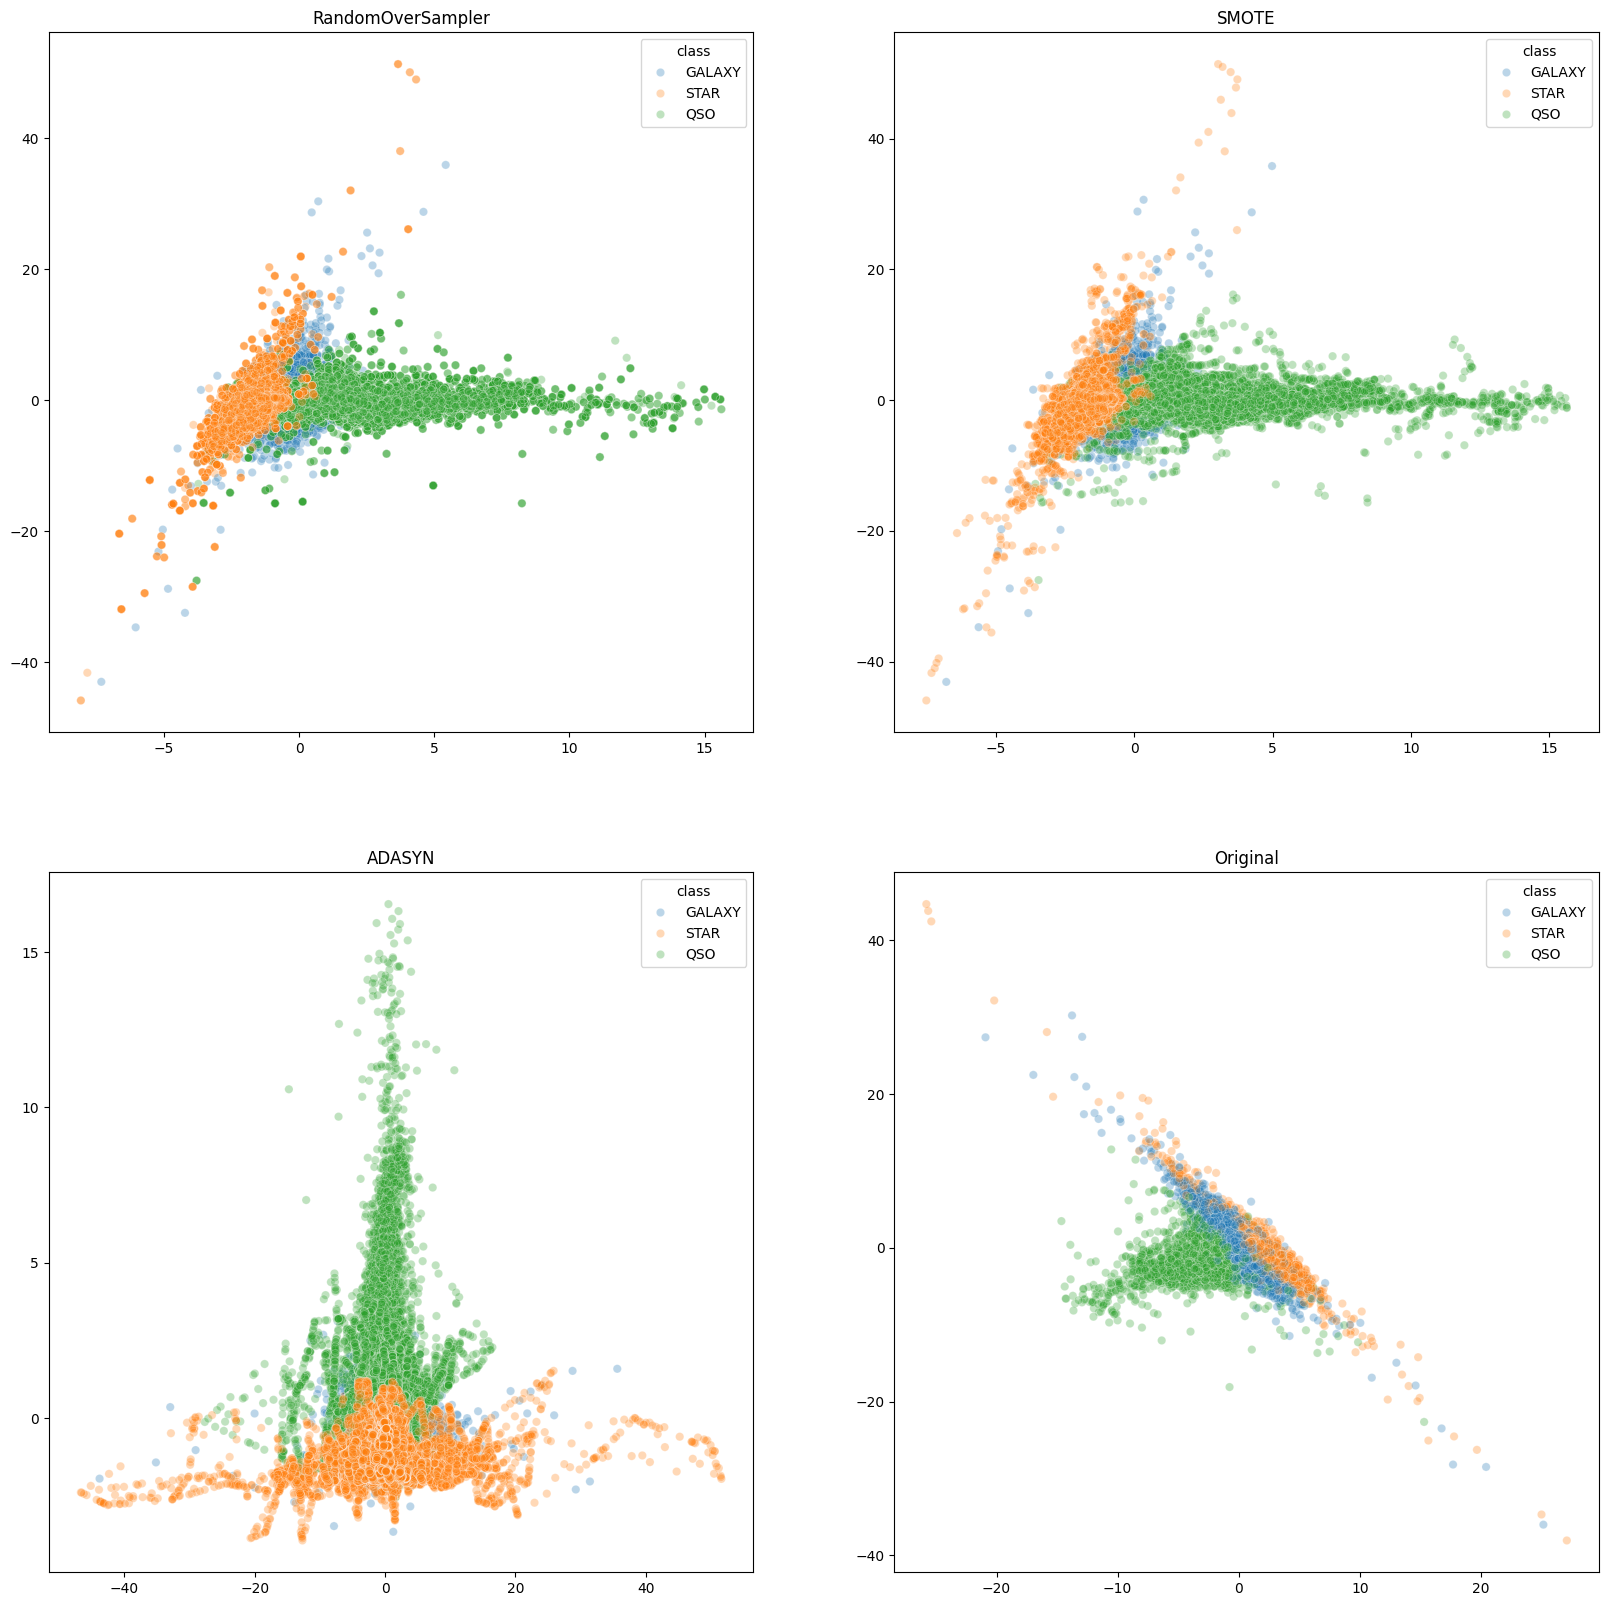

In [14]:
# Plot the pca representation of the data with class color

fg, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()
for i, (embed, title, y ) in enumerate(zip([embedding_ros, embedding_sm, embedding_ada, embedding_original], ['RandomOverSampler', 'SMOTE', 'ADASYN', 'Original'], [y_ros, y_sm, y_ada, df['class']])):
    sns.scatterplot(
        x=embed[:,0], y=embed[:,1],
        hue=y,
        legend='full',
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(title)

2. Undersampling

In [15]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X, y)


In [21]:
cc = ClusterCentroids(random_state=0)
X_cc, y_cc = cc.fit_resample(X, y)

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
nm3 = NearMiss(version=3,sampling_strategy='majority')
X_nm3, y_nm3 = nm3.fit_resample(X, y)

/usr/local/lib/python3.9/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [17]:
renn = RepeatedEditedNearestNeighbours(sampling_strategy='majority',n_neighbors=5,max_iter=200)
X_renn, y_renn = renn.fit_resample(X, y)


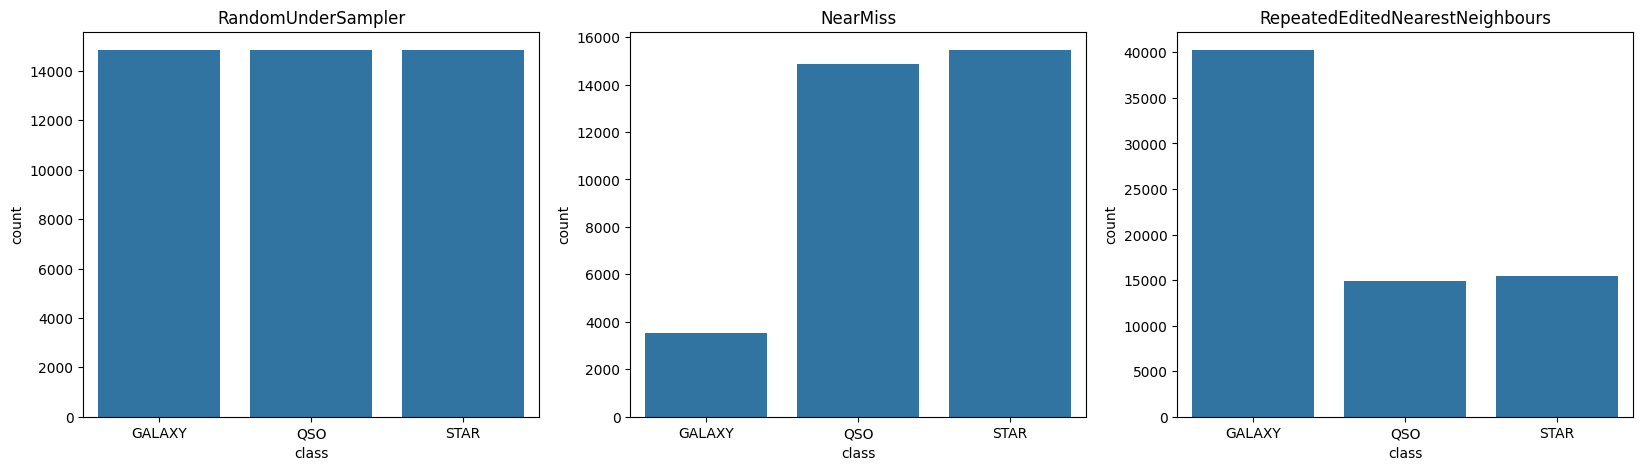

In [18]:
# Display distribution of the classes after undersampling methods
fg, axes = plt.subplots(2,2)
axes = axes.flatten()
i=0
for X_s, y_s, title in zip([X_rus, X_cc, X_nm3, X_renn], [y_rus, y_cc, y_nm3, y_renn], ['RandomUnderSampler', 'ClusterCentroids', 'NearMiss', 'RepeatedEditedNearestNeighbours']):
    sns.countplot(x=y_s, ax=axes[i])
    axes[i].set_title(title)
    i+=1


In [19]:
embedding_rus = reducer.fit_transform(X_rus)

In [24]:
embedding_cc = reducer.fit_transform(X_cc)

In [23]:
embedding_nm3 = reducer.fit_transform(X_nm3)

In [25]:
embedding_renn = reducer.fit_transform(X_renn)

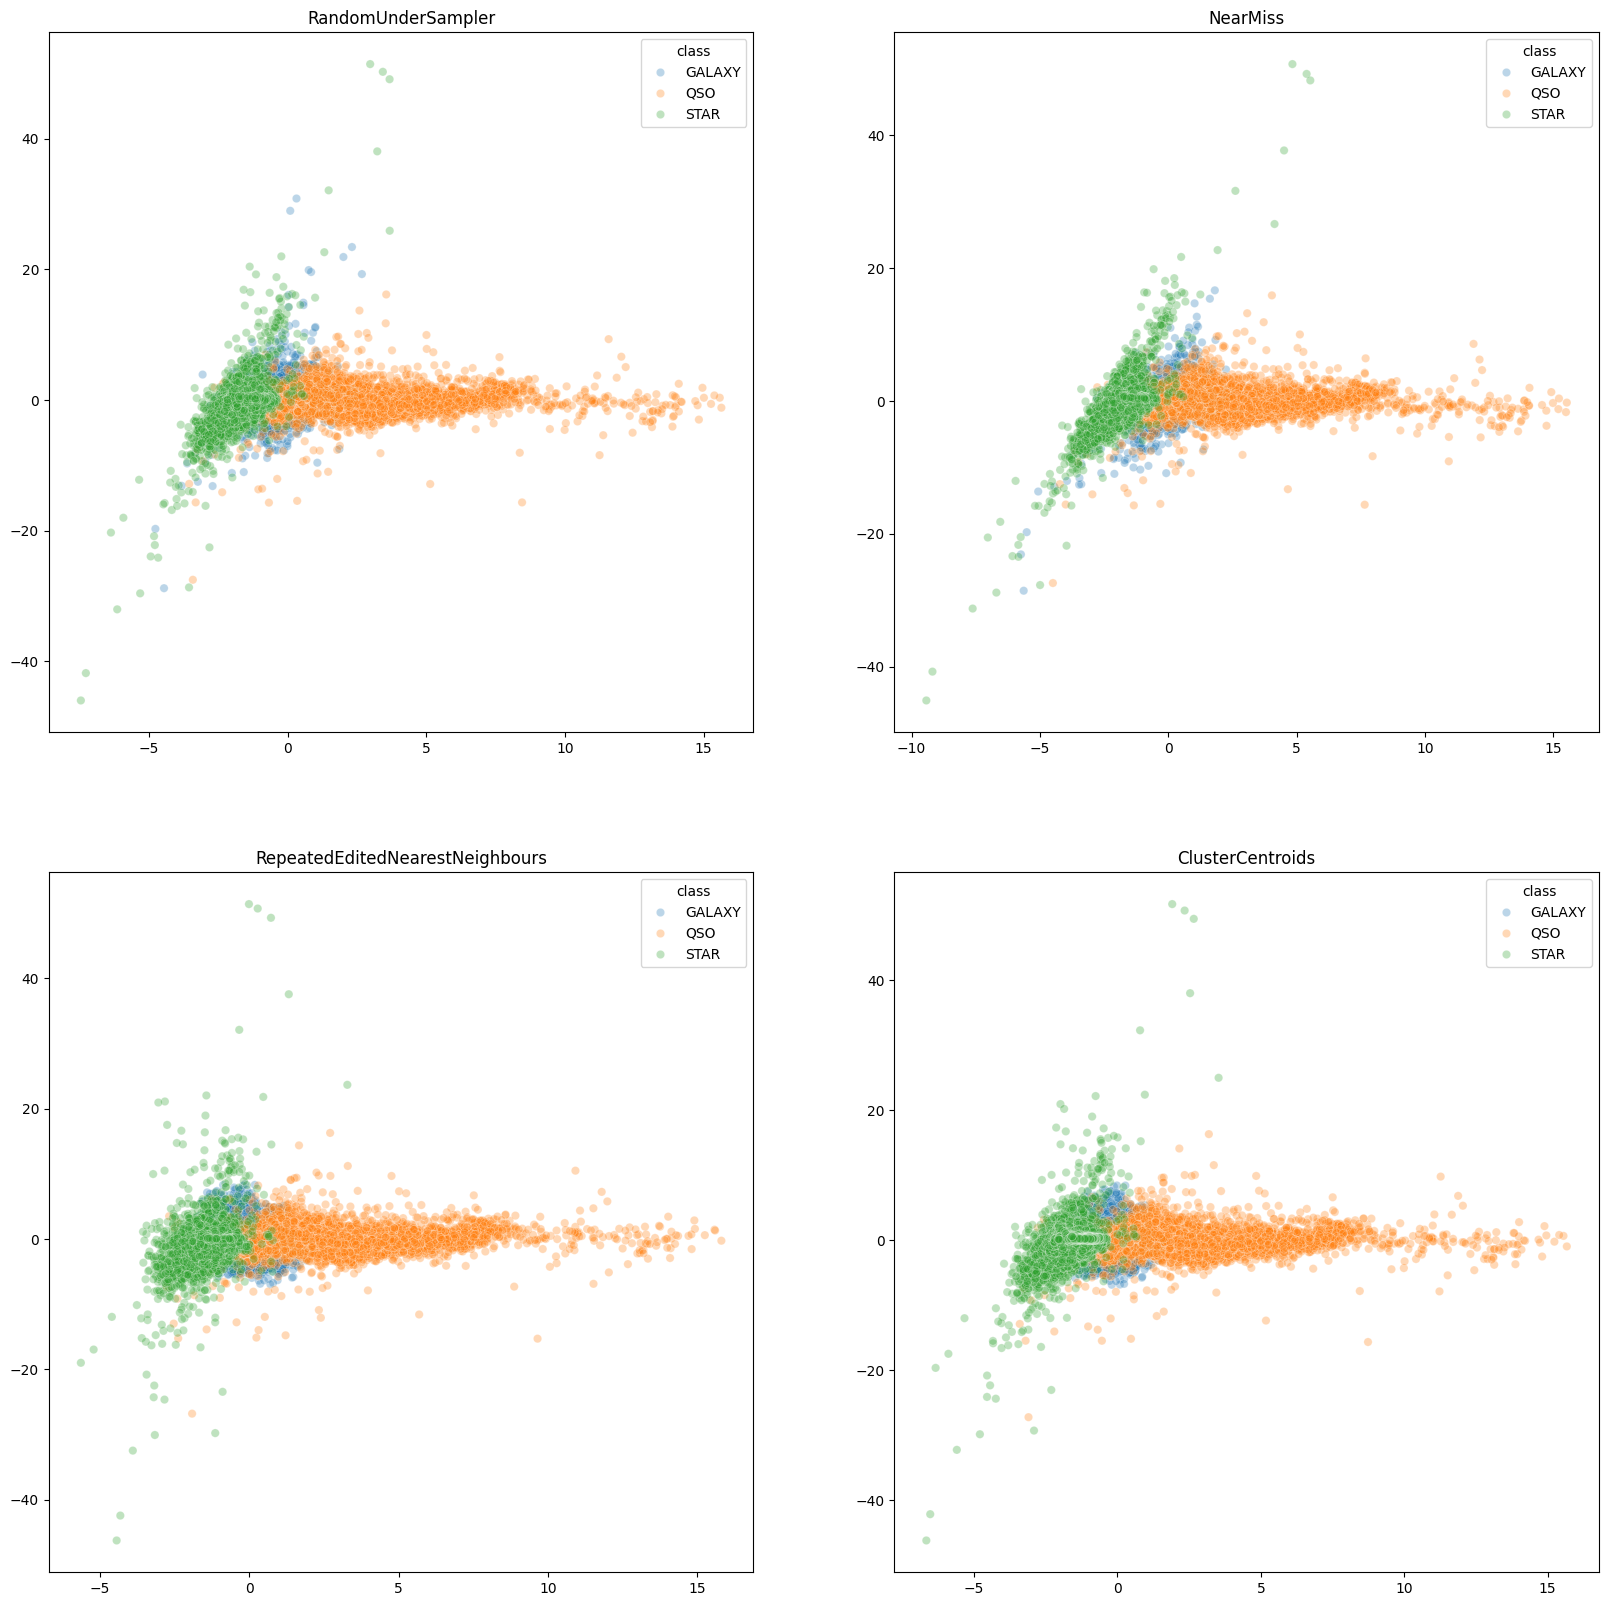

In [26]:
# Plot the pca representation of the data with class color

fg, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()

for i, (embed, title, y ) in enumerate(zip([embedding_rus, embedding_nm3, embedding_renn, embedding_cc], ['RandomUnderSampler', 'NearMiss', 'RepeatedEditedNearestNeighbours', 'ClusterCentroids'], [y_rus, y_nm3, y_renn, y_cc])):
    sns.scatterplot(
        x=embed[:,0], y=embed[:,1],
        hue=y,
        legend='full',
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(title)
